## **TP2 y TP3**

Deep Learning

Juan Pablo Nieto Uribe



# **Clase 2**

**1. Stochastic Gradient Descent para encontrar el máximo de una función**

Implementar en Python un algoritmo basado en Stochastic Gradient Descent para encontrar numéricamente el mínimo de $y=-(x-2)^2+3$ 



*   ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? 
*   ¿En qué momento detuviste la búsqueda y por qué?
*   ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia?
*   ¿Cuáles son los hiper-parámetros del algoritmo?

In [ ]:
import random as rn

#Hiperparámetros del modelo
tolerancia=0.00001
learningRate=0.01

#Inicializo un valor exagerado para el error
error=1000000

#Defino la función que quiero optimizar
def funcionOptimizar(x):
    interior=x-2
    intCuad=interior**2
    menos=-intCuad
    devolver=menos+3
    return (devolver*(-1))

def derivadaFuncion(x):
    #Multiplico esta función por -1 para convertirlo en un problema de minimización
    return (4-(2*x))*(-1)

def errorAbsoluto(y, yim1):
    return abs(yim1-y)

#Me paro en un punto random de la función
xim1=rn.random()
y=funcionOptimizar(xim1)
x=rn.random()

#Evalúo la función
yhat=funcionOptimizar(x)

#Inicio las iteraciones

while error>tolerancia:
    #calculo el error sobre una única muestra
    error=errorAbsoluto(x,xim1)
    #Calculo la derivada
    deriv=derivadaFuncion(x)
    #Actualizo el valor de x
    xim1=x
    x=x-learningRate*deriv
    yhat=y
    y=funcionOptimizar(x)
    
print('El valor máximo es ',-y, 'cuando x es',x)
        

El valor máximo es  2.999999778392489 cuando x es 1.9995292479302544


* Encontramos de esta forma que el valor que encontró el algoritmo para el máximo de la función (equivalente al mínimo de la función multiplocada por -1) es igual a 3, cuadno x=2. Este valor lo podemos comprobar observando la gráfica de la función:

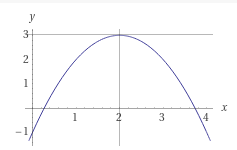

*   Para detener la búsqueda, definí un valor de tolerancia. Una vez el error alcanzó ese valor, el ciclo while detuvo las iteraciones porque el cambio en cada ciclo ya se volvía despreciable. 
*   Los valores random están siendo inicializados en este caso como una variable uniforme entre 0 y 1. Dado que este es un problema que no cuenta con máximos locales, la convergencia sólo se ve afectada en el tiempo que se tarda en llegar a ella. Sin embargp, en problemas que sí cuentan con máximos locales, es posible que al inicializar de una u otra manera, se llegue a uno de estos máximos y el algoritmo quede atascado allí. 
* Para este caso, los hiperparámetros del modelo son tanto el Learning Rate, como la tolerancia del error. 



**2. Mini-Batch Gradient Descent para entrenar un modelo cuadrático**

a. Crear un dataset sintético con 10.000 muestras a partir de la siguiente expresión (Donde "x" es el feature que toma valores entre 0 y 4, e "y" es la salida):

$y=-(x-2)^2+3+0.2*sin(16*x)$

In [ ]:
import math
#Creamos las listas
x=[]
y=[]
#Definimos nuestra función
def funcionEvaluar(x):
  p1=-(x-2)**2
  p2=3
  p3=(math.sin(16*x))/5
  return p1+p2+p3

#Recorremos 
for i in range(10000):
  valX=i*0.0004
  valY=funcionEvaluar(valX)
  x.append(valX)
  y.append(valY)

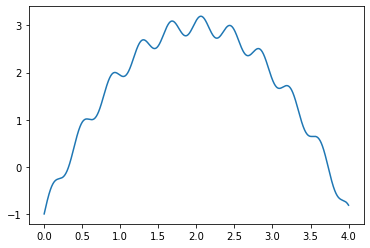

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

b. Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación. Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimicen el ECM (Error Cuadrático Medio)(El ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (Usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar la evolución del ECM con el número de Epochs

In [ ]:
#Importamos numpy para poder hacer las operaciones vectorizadas
import numpy as np
import random as rn

#Cargamos los hiperparámetros del modelo
nEpochs=1000
tamanioBatch=100
learningRate=0.01

#Inicializo un primer batch
currentBatchIndex=1

#Calculo el número de batches
batches=int(10000/tamanioBatch)

#Inicializamos como números aleatorios los parámetros w1,w2 y w3
w1=rn.random()
w2=rn.random()
w3=rn.random()

#Definimos una función cuadrática como "red neuronal"
def sNnet(w1,w2,w3,x):
  xcuad=x**2
  resp=(w1*xcuad)+(w2*x)+w3
  #Como se trata de un problema de maximización, invertimos la función y lo converimos en una función de minimización
  return -resp

def derivadaRespectoaW1(x,y,w1,w2,w3):
    derRespW1=-2*x*x*func(x,y,w1,w2,w3)
    return derRespW1

def derivadaRespectoaW2(x,y,w1,w2,w3):
    derRespW2=-2*x*func(x,y,w1,w2,w3)
    return derRespW2

def derivadaRespectoaW3V(x,y,w1,w2,w3):
    derRespW3=-2*func(x,y,w1,w2,w3)
    return derRespW3

def func(x,y,w1,w2,w3):
    returner=(-w1*x*x)+(-w2*x)+(-w3)+y
    return returner
    
#Vectorizamos las funciones
sNnetV=np.vectorize(sNnet)
derivadaRespectoaW1V=np.vectorize(derivadaRespectoaW1)
derivadaRespectoaW2V=np.vectorize(derivadaRespectoaW2)


#Ejecutamos Mini-batch
for epochs in range(nEpochs):
  for batch in range(batches):
    #Reinicio los valores que ingreso en el valBatch
    xBatch=np.zeros((tamanioBatch))
    yHatBatch=np.zeros((tamanioBatch))
    yBatch=np.zeros((tamanioBatch))
    
    #Construyo los vectores para X y Y
    for i in range(tamanioBatch):
      xBatch[i]=x[(batch*tamanioBatch)+i]
      yBatch[i]=y[(batch*tamanioBatch)+i]
    
    #Evalúo Y hat para el vector
    yHatBatch=sNnetV(w1,w2,w3,xBatch)
    
    #Calculo el error cuadrático medio
    error=((yBatch-yHatBatch)**2)/tamanioBatch
    
    #Calculamos las derivadas respecto a cada uno de los parámetros
    derW1=derivadaRespectoaW1V(xBatch,yBatch,w1,w2,w3)
    derW2=derivadaRespectoaW2V(xBatch,yBatch,w1,w2,w3)
    derW3=derivadaRespectoaW3V(xBatch,yBatch,w1,w2,w3)
    
    #Sacamos el promedio de cada una de las derivadas
    derPW1=np.sum(derW1)/tamanioBatch
    derPW2=np.sum(derW2)/tamanioBatch
    derPw3=np.sum(derW3)/tamanioBatch

    #Finalmente, actualizamos los valores de W1, W2 y W3
    w1=w1-learningRate*derPW1
    w2=w2-learningRate*derPW2
    w3=w3-learningRate*derPw3
    
  print('Epoch',epochs+1)
    
print(w1,w2,w3)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 11

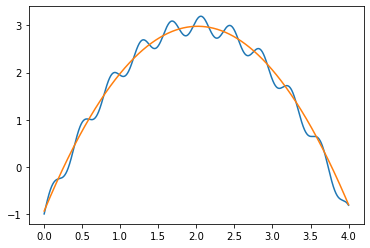

In [ ]:
xAj=[]
yAj=[]
#Definimos nuestra función
def funcionEvaluarAj(x):
  p1=w1*x*x
  p2=w2*x
  p3=w3
  return p1+p2+p3

#Recorremos 
for i in range(10000):
  valX=i*0.0004
  valY=funcionEvaluarAj(valX)
  xAj.append(valX)
  yAj.append(valY)

plt.plot(x,y)
plt.plot(xAj,yAj)
plt.show()



---

# **Clase 3**

a. Implementar el ejercicio 2 de la Clase 2 utilizando Pytorch.

Comenzamos por inicializar los hiperparámetros del modelo.

In [ ]:
tam_batch=1

Hacemos el split de los datos en dataset de train y test.

Sean los datos x & y los datos generados en el punto anterior.

In [ ]:
import numpy as np

#Pasamos tanto x como y a numpy
x=np.asarray(x)
y=np.asarray(y)

#Miramos cuál es el tamaño del array
n=x.shape[0]

#Barajamos los valores que definimos anteriormente
idx=np.random.permutation(np.arange(0,n))

#Creamos los datasets de train y validación tomando un 85% del dataset original para entrenamiento. Hasta este punto, solo estamos trabajando con índices.
train_idx=idx[0:int(0.85*n)]
valid_idx=idx[int(0.85*n):]

#Una vez tenemos los índices, lo transformamos en datos en X y Y.
X_train=x[train_idx]
Y_train=y[train_idx]
X_valid=x[valid_idx]
Y_valid=y[valid_idx]

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(8500,)
(8500,)
(1500,)
(1500,)


Luego revisamos que tengamos acceso a gpu. Si es el caso, la utilizamos.

In [ ]:
#Comenzando importando las librerías que vamos a necesitar
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
device=""
if torch.cuda.is_available():
  device="cuda:0"
else:
  device="cpu"

print('El device que vamos a utilizar es',device)

El device que vamos a utilizar es cuda:0


Finalmente desarrollamos con la NNet 

In [ ]:
class MiDataset(Dataset):

  def __init__(self,xR,yR):
    super().__init__()
    self.xR=xR
    self.yR=yR

  def __len__(self):
    return self.xR.shape[0]

  def __getitem__(self,idx):
    return self.xR[idx], self.yR[idx]

In [ ]:
train=MiDataset(X_train,Y_train)
valid=MiDataset(X_valid,Y_valid)
print('Train',len(train))
print('Valid',len(valid))

Train 8500
Valid 1500


In [ ]:
#Defino la función que, a partir de los pesos y los biases, me calcula a,b,c
def pesosACuadratica(wa,wb,wc,wd,we,wf,bp1,bp2,bp3):
  a=(wa*we)+(wd*wf)
  b=(wc*we)+(wb*wf)
  c=(bp1*we)+(bp2*wf)+(bp3)
  return a,b,c

k,l,m=pesosACuadratica(1,4,2,3,5,6,1000,2000,3000)
print(k,l,m)

23 34 20000


In [ ]:
#Hacemos los dataloaders
train_dataloader=DataLoader(train,batch_size=tam_batch,shuffle=True)
valid_dataloader=DataLoader(valid,batch_size=tam_batch,shuffle=True)

In [ ]:
batch_1=next(iter(train_dataloader))

In [ ]:
class RNeu(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1=torch.nn.Linear(in_features=2, out_features=2,bias=True)
    self.output=torch.nn.Linear(in_features=2, out_features=1,bias=True)
  
  def forward(self,x): #Shape -> 2,1
    x=self.linear1(x)
    x=self.output(x)
    wL1=self.linear1.weight.data
    wLo=self.output.weight.data
    bL1=self.linear1.bias.data
    bL2=self.output.bias.data
    return x,wL1,wLo,bL1,bL2



In [ ]:
nnet=RNeu()

In [ ]:
def numYCuad(x):
  resp=[]
  xcuad=x**2
  resp.append(x)
  resp.append(xcuad)
  respEmb=torch.tensor(resp)
  return respEmb

In [ ]:
k=numYCuad(5)
print(k)

tensor([ 5, 25])


In [ ]:
#x_batch=next(iter(train_dataloader))[0]
#x_batch=x_batch.float()

#Creamos el x_batch que le pasamos a la red
#vbatch=[]
#for iteradorBatches in range(int(len(train)/tam_batch)):
  #inicio=iteradorBatches*tam_batch
  #for iteradorEnBatches in range(tam_batch):
    #valorResp=inicio+(iteradorEnBatches*0.0004)
    #valorResp=valorResp.float()
    #vbatch.append(valorResp)

#print(x_batch[0])
#y_batch=nnet(numYCuad(x_batch))

In [ ]:
#print(y_batch)

#print(y_batch[1][1])

NameError: ignored

In [ ]:
optimizer=torch.optim.Adam(nnet.parameters(),lr=0.001)
loss_function=torch.nn.MSELoss()

In [ ]:
#Pasamos la red al dispositivo
nnet.to(device)

#Hacemos la lista con la función de pérdida y el auc de entrenamiento.

RNeu(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)